In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [0]:
# import numpy as np
# np.set_printoptions(threshold=np.inf)
# print((features_vgg_train[0]))

In [0]:
df = pd.read_csv("/content/drive/My Drive/youtube_project/real_train.csv", encoding='utf-8-sig')
y = df['category_id']
y = np.array(y)
y.shape

(11199,)

In [0]:
features_vgg_train = np.load('/content/drive/My Drive/youtube_project/extract_features_transfer_train.npy')
features_vgg_train.shape

(11199, 5120)

In [0]:
feature_fxt = np.load('/content/drive/My Drive/youtube_project/okt_fxt.npy')
feature_fxt.shape

(11199, 100)

### Test_Data

In [0]:
df2 = pd.read_csv("/content/drive/My Drive/youtube_project/real_test.csv", encoding='utf-8-sig')
y_test = df2['category_id']
y_test = np.array(y_test)
y_test.shape

(2800,)

In [0]:
features_vgg_test = np.load('/content/drive/My Drive/youtube_project/extract_features_transfer_test.npy')
features_vgg_test.shape

(2800, 5120)

In [0]:
feature_fxt_test = np.load('/content/drive/My Drive/youtube_project/okt_fxt_test.npy')
feature_fxt_test.shape

(2800, 100)

### data split

In [0]:
case1_data = np.c_[features_vgg_train,feature_fxt]
nanmask = ~np.isnan(case1_data).any(axis=1)
case1_nan = case1_data[nanmask]
y_nan = y[nanmask]

In [0]:
sum(~nanmask)

36

In [0]:
case1_nan.shape, y_nan.shape

((11163, 5220), (11163,))

In [0]:
test_data = np.c_[features_vgg_test,feature_fxt_test]
nanmask_test = ~np.isnan(test_data).any(axis=1)
test_data_nan = test_data[nanmask_test]
y_test_nan = y_test[nanmask_test]

In [0]:
test_data_nan.shape, y_test_nan.shape

((2782, 5220), (2782,))

# Train

## 2. fxt + vgg

In [0]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[5220]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(1024, activation="relu",
                         kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu",
                         kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

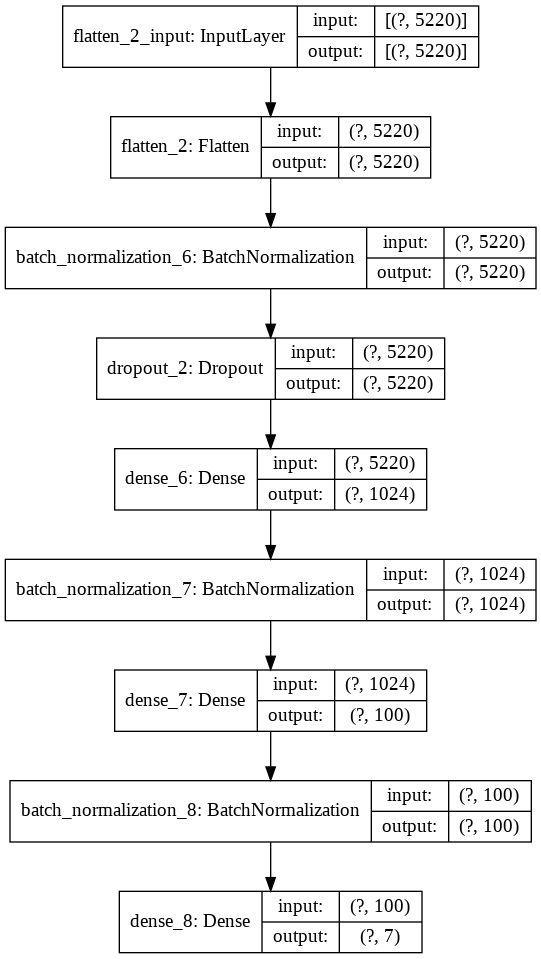

In [0]:
keras.utils.plot_model(model2, show_shapes=True)

In [0]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_valid, y_train, y_valid = train_test_split(case1_nan, y_nan)
X_train.shape, X_valid.shape
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
262/262 [==============================] - 4s 14ms/step - loss: 0.6495 - accuracy: 0.8975 - val_loss: 0.8434 - val_accuracy: 0.8617
Epoch 2/20
262/262 [==============================] - 4s 14ms/step - loss: 0.6759 - accuracy: 0.8901 - val_loss: 0.7958 - val_accuracy: 0.8703
Epoch 3/20
262/262 [==============================] - 4s 14ms/step - loss: 0.6456 - accuracy: 0.8991 - val_loss: 0.7997 - val_accuracy: 0.8674
Epoch 4/20
262/262 [==============================] - 4s 14ms/step - loss: 0.6795 - accuracy: 0.8899 - val_loss: 0.8439 - val_accuracy: 0.8603
Epoch 5/20
262/262 [==============================] - 4s 14ms/step - loss: 0.6687 - accuracy: 0.8950 - val_loss: 0.8032 - val_accuracy: 0.8649
Epoch 6/20
262/262 [==============================] - 4s 14ms/step - loss: 0.6275 - accuracy: 0.9059 - val_loss: 0.7921 - val_accuracy: 0.8631
Epoch 7/20
262/262 [==============================] - 4s 14ms/step - loss: 0.6523 - accuracy: 0.8954 - val_loss: 0.8096 - val_accuracy: 0.8628

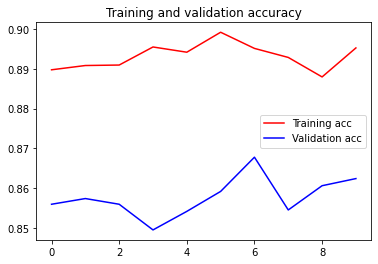

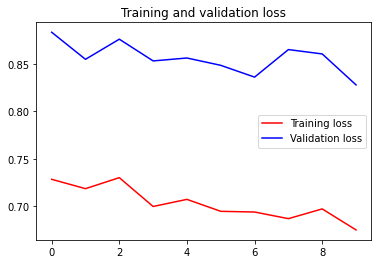

In [0]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Test** 

In [0]:
score = model2.evaluate(test_data_nan, y_test_nan)

87/87 [==============================] - 0s 3ms/step - loss: 0.7603 - accuracy: 0.8580


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
pred_test = np.argmax(model2.predict(test_data_nan), axis=-1)

In [0]:
y_true = pd.Series(y_test_nan)
y_pred = pd.Series(pred_test)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'])

# labels=["cooking", "economy", "game","movie","pets","politics","sports"]

Predicted,0,1,2,3,4,5,6
True,,,,,,,
0,365,1,10,6,6,1,10
1,2,367,4,5,0,14,8
2,6,1,313,19,4,13,39
3,1,6,32,318,5,15,21
4,8,1,5,11,357,3,9
5,3,21,4,8,1,354,8
6,5,9,20,23,1,26,313


In [0]:
print(classification_report(y_test_nan,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       399
           1       0.90      0.92      0.91       400
           2       0.81      0.79      0.80       395
           3       0.82      0.80      0.81       398
           4       0.95      0.91      0.93       394
           5       0.83      0.89      0.86       399
           6       0.77      0.79      0.78       397

    accuracy                           0.86      2782
   macro avg       0.86      0.86      0.86      2782
weighted avg       0.86      0.86      0.86      2782



In [0]:
y_pred.to_csv("/content/drive/My Drive/youtube_project/pred_final.csv",header=False)

In [0]:
df2.head()

,Unnamed: 0,video_name,thumbnail,category_id
0,25171,"경희대 '춤출래', 🕺이게 대학생한테 나올 수 있는 갬성인가요?? 시대를 초월한 안...",https://i.ytimg.com/vi/AzaaAfLTdps/hqdefault.j...,5
1,31732,[꿀팁] 팔꿈치가 아픈이유 :: 인클라인 플라이,https://i.ytimg.com/vi/2LXRvCyWlhI/hqdefault.j...,6
2,15261,라이너LIVE 3월 첫 라이브입니다,https://i.ytimg.com/vi/Zd5fkcot13I/hqdefault.j...,3
3,2377,[증시하이라이트] 외국인 한달째 순매도 연말 지수 위협 받나? /증시라인/한국경제TV,https://i.ytimg.com/vi/_YHG13x7JYI/hqdefault.j...,1
4,8760,"가지?고추? 가지고추! 항암, 고혈압, 당뇨, 눈건강에 좋은 보약 레시피",https://i.ytimg.com/vi/XJXuhwoKsEk/hqdefault.j...,0


In [0]:
df2.iloc[0,2]

'https://i.ytimg.com/vi/AzaaAfLTdps/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ==&rs=AOn4CLCM81tLKOkghI-yGj6new4FvhRkcQ'